In [1]:
using Plots, DataFrames
gadfly()
default(size=(500,300))

# load the table
df = readtable(joinpath(Pkg.dir("Plots"), "examples", "meetup", "winequality-white.csv"), separator=';')
size(df)

INFO: Recompiling stale cache file /Users/tom/.julia/lib/v0.4/Plots.ji for module Plots.


(4898,12)

In [2]:
nms = names(df)

12-element Array{Symbol,1}:
 :fixed_acidity       
 :volatile_acidity    
 :citric_acid         
 :residual_sugar      
 :chlorides           
 :free_sulfur_dioxide 
 :total_sulfur_dioxide
 :density             
 :pH                  
 :sulphates           
 :alcohol             
 :quality             

In [3]:
M = Array(df)

4898x12 Array{Real,2}:
 7.0  0.27   0.36  20.7   0.045  45.0  170.0  1.001    3.0   0.45   8.8   6
 6.3  0.3    0.34   1.6   0.049  14.0  132.0  0.994    3.3   0.49   9.5   6
 8.1  0.28   0.4    6.9   0.05   30.0   97.0  0.9951   3.26  0.44  10.1   6
 7.2  0.23   0.32   8.5   0.058  47.0  186.0  0.9956   3.19  0.4    9.9   6
 7.2  0.23   0.32   8.5   0.058  47.0  186.0  0.9956   3.19  0.4    9.9   6
 8.1  0.28   0.4    6.9   0.05   30.0   97.0  0.9951   3.26  0.44  10.1   6
 6.2  0.32   0.16   7.0   0.045  30.0  136.0  0.9949   3.18  0.47   9.6   6
 7.0  0.27   0.36  20.7   0.045  45.0  170.0  1.001    3.0   0.45   8.8   6
 6.3  0.3    0.34   1.6   0.049  14.0  132.0  0.994    3.3   0.49   9.5   6
 8.1  0.22   0.43   1.5   0.044  28.0  129.0  0.9938   3.22  0.45  11.0   6
 8.1  0.27   0.41   1.45  0.033  11.0   63.0  0.9908   2.99  0.56  12.0   5
 8.6  0.23   0.4    4.2   0.035  17.0  109.0  0.9947   3.14  0.53   9.7   5
 7.9  0.18   0.37   1.2   0.04   16.0   75.0  0.992    3.18  0.63

In [4]:
C = cor(M)

12x12 Array{Real,2}:
  1          -0.0226973   0.289181    …  -0.017143   -0.120881   -0.113663  
 -0.0226973   1          -0.149472       -0.0357281   0.0677179  -0.194723  
  0.289181   -0.149472    1               0.0623309  -0.0757287  -0.00920909
  0.0890207   0.0642861   0.0942116      -0.0266644  -0.450631   -0.0975768 
  0.0230856   0.0705116   0.114364        0.0167629  -0.360189   -0.209934  
 -0.0493959  -0.0970119   0.0940772   …   0.0592172  -0.250104    0.00815807
  0.0910698   0.0892605   0.121131        0.134562   -0.448892   -0.174737  
  0.265331    0.0271138   0.149503        0.0744931  -0.780138   -0.307123  
 -0.425858   -0.0319154  -0.163748        0.155951    0.121432    0.0994272 
 -0.017143   -0.0357281   0.0623309       1          -0.0174328   0.0536779 
 -0.120881    0.0677179  -0.0757287   …  -0.0174328   1           0.435575  
 -0.113663   -0.194723   -0.00920909      0.0536779   0.435575    1         

[Plots.jl] Initializing backend: gadfly

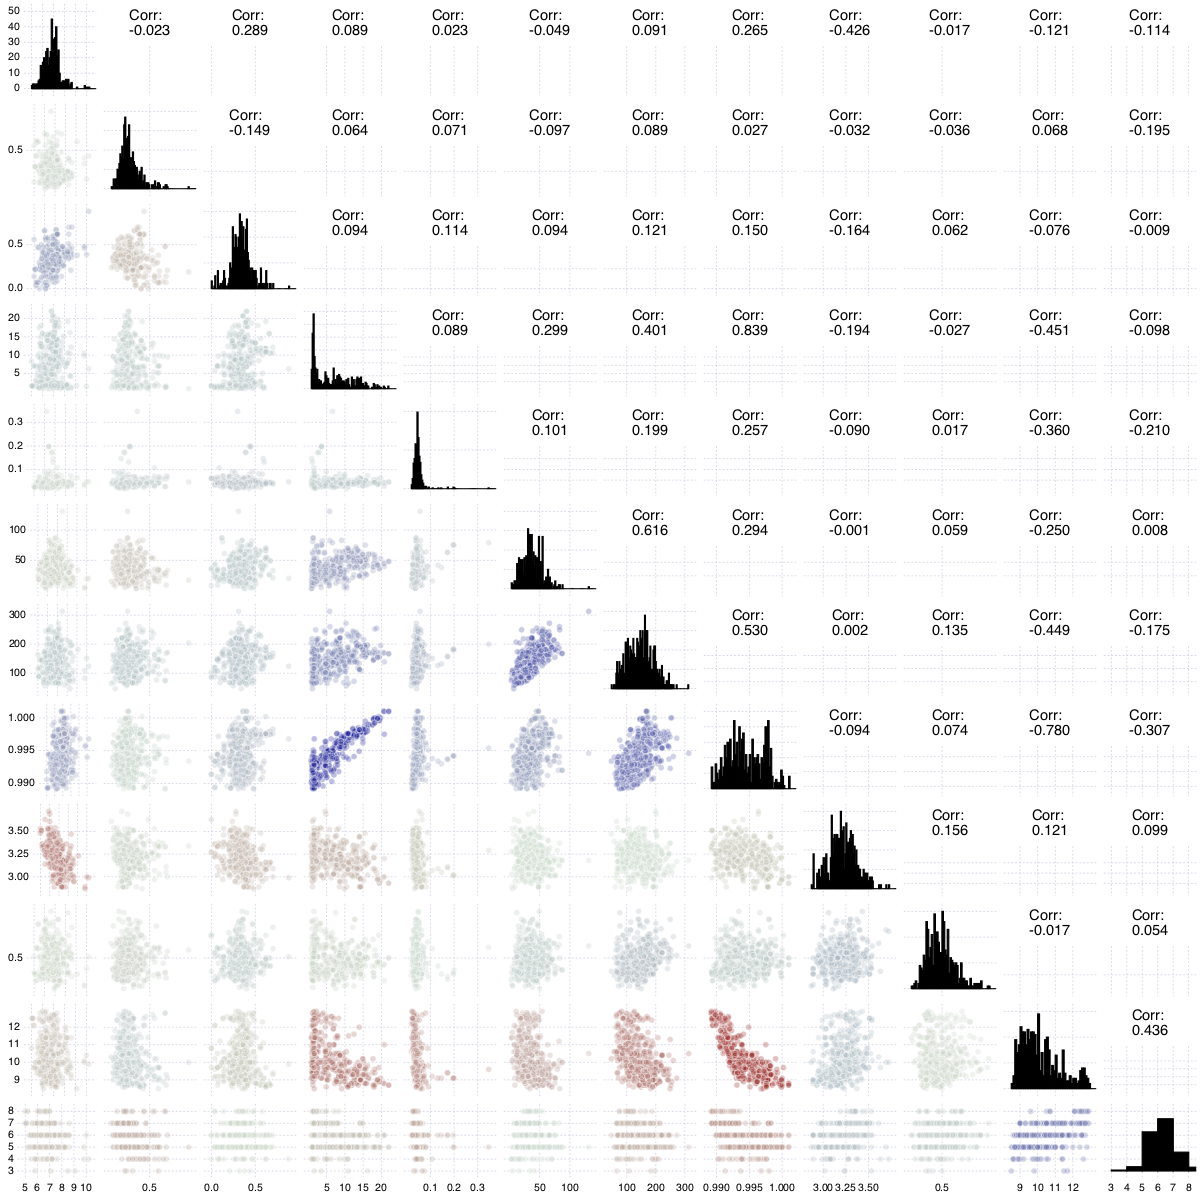

In [5]:
corrplot(M[1:500,:], C, size=(1200,1200))

In [6]:
reshape(nms,3,4)

3x4 Array{Symbol,2}:
 :fixed_acidity     :residual_sugar       :total_sulfur_dioxide  :sulphates
 :volatile_acidity  :chlorides            :density               :alcohol  
 :citric_acid       :free_sulfur_dioxide  :pH                    :quality  

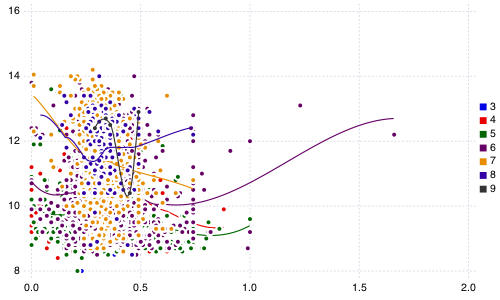

In [10]:
plot(df, :citric_acid, :alcohol, group=:quality, m=3, l=(2,:none), smooth=0.95)

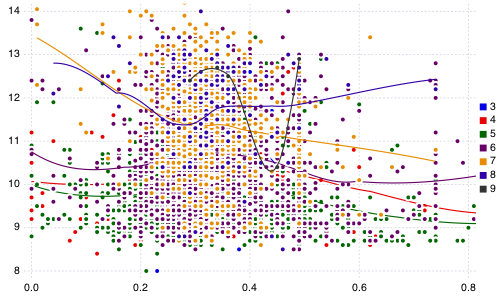

In [11]:
plot!(xlim=(0,0.8),ylim=(8,14))

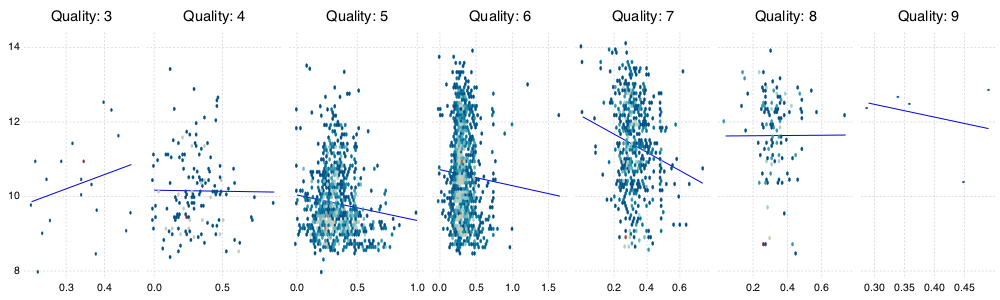

In [20]:
subplot(df, :citric_acid, :alcohol, group=:quality, l=:hexbin, n=7, nr=1, link=true,
title=map(i->"Quality: $i", (3:9)'), leg=false, size=(1000,300), smooth=true)

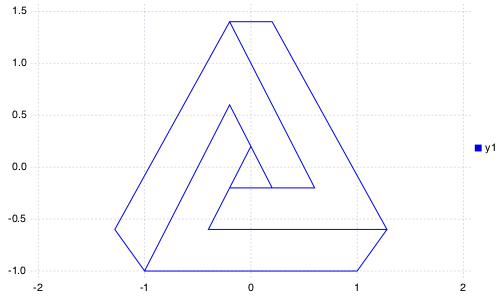

In [16]:
pts = [
    (-2.5, 2.5),
    (-3.2, 1.5),
    (-0.5, -3.5),
    (0.5, -3.5),
    (3.2, 1.5),
    (2.5, 2.5),
    (-2.5, 2.5),
    (-0.5, -1.5),
    (0.0, -0.5),
    (-1.0, 1.5),
    (3.2, 1.5),
    (0.5, -3.5),
    (-0.5, -3.5),
    (1.5, 0.5), 
    (-0.5, 0.5),
    (0.0, -0.5),
    (0.5, 0.5)
]

scalar = 1 / 2.5
pts = [(x*scalar, y*scalar) for (x,y) in pts]

x, y = Float64[x for (x,y) in pts], Float64[y for (x,y) in pts]

plot(x,-y)